In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Import the data
import numpy as np
df = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m14/lesson_2/datasets/crowdfunding-missing-data.csv")
df.head()

,goal,pledged,backers_count,days_active,outcome
0,100,0,0.0,17,0
1,1400,14560,158.0,27,1
2,108400,142523,1425.0,20,1
3,4200,2477,24.0,40,0
4,7600,5265,NaN,4,0


In [3]:
# Split into training and testing sets
X = df.drop(columns = 'outcome')
y = df['outcome'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [4]:
# Find the percentage of rows missing values in each column
X_train.isna().sum()/len(df)

goal             0.000000
pledged          0.000000
backers_count    0.093888
days_active      0.000000
dtype: float64

In [5]:
# Describe the other columns in the rows with missing values
X_train.loc[X_train['backers_count'].isna()].describe()

,goal,pledged,backers_count,days_active
count,106.000000,106.000000,0.0,106.000000
mean,61158.169811,28543.707547,NaN,3.254717
std,63874.065530,35814.835146,NaN,1.841642
min,100.000000,1.000000,NaN,0.000000
25%,7100.000000,3020.250000,NaN,2.000000
50%,29368.000000,8691.500000,NaN,3.000000
75%,103125.000000,48281.250000,NaN,5.000000
max,195200.000000,176112.000000,NaN,6.000000


In [6]:
# Describe the whole dataset
X_train.describe()

,goal,pledged,backers_count,days_active
count,846.000000,846.000000,740.000000,846.000000
mean,45802.596927,41702.281324,810.135135,27.165485
std,53201.660930,53864.544047,1119.610663,16.398976
min,100.000000,0.000000,0.000000,0.000000
25%,4900.000000,6517.250000,110.750000,15.000000
50%,9800.000000,13200.000000,237.500000,25.000000
75%,83595.500000,59762.250000,1250.250000,40.000000
max,199000.000000,198628.000000,7295.000000,60.000000


[1 6 5 4 2 3 0]


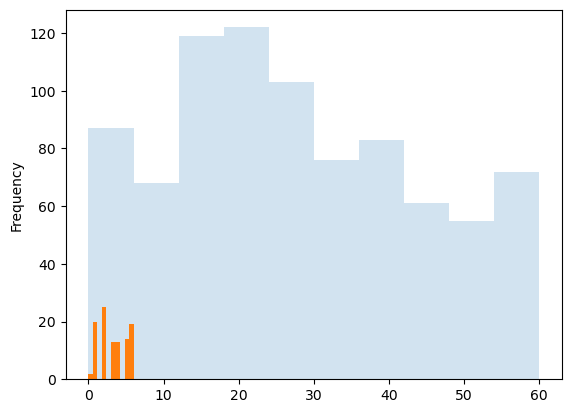

In [7]:
# Perform other exploratory analysis here
# For this specific example, try making histograms
# of days_active for the whole dataset and then
# again only when backers_count is missing.

X_train['days_active'].plot(kind='hist', alpha=0.2)
X_train.loc[df['backers_count'].isna(), 'days_active'].plot(kind='hist')
print(X_train.loc[df['backers_count'].isna(), 'days_active'].unique())

In [8]:
# Since backers_count seems to be missing in the first week
# of a campaign, removing the data would be detrimental.
# A good choice might be to fill the data using the backers
# counts from campaigns in week 2.

mean_of_week_2_backers_counts = X_train.loc[(X_train['days_active'] >= 6) & (X_train['days_active'] <= 13), 'backers_count'].mean()
mean_of_week_2_backers_counts


746.7727272727273

In [9]:
# Create a function to fill missing values with half of the mean of week 2

def X_preprocess(X_data):
    X_data['backers_count'] = X_data['backers_count'].fillna(int(round(mean_of_week_2_backers_counts/2)))
    return X_data

In [10]:
# Preprocess the training and testing data

X_train_clean = X_preprocess(X_train)
X_test_clean = X_preprocess(X_test)

In [11]:
# Check for missing values
print(X_train_clean.isna().sum()/len(X_train_clean))
print(X_test_clean.isna().sum()/len(X_test_clean))

goal             0.0
pledged          0.0
backers_count    0.0
days_active      0.0
dtype: float64
goal             0.0
pledged          0.0
backers_count    0.0
days_active      0.0
dtype: float64
